#1. File upload

model_name = 'res10_300x300_ssd_iter_140000.caffemodel'

prototxt_name = 'deploy.prototxt.txt'

file_name = 'obama_01.jpeg, obama_02.jpeg, obama_03.jpg'

In [1]:
from google.colab import files
files.upload()

Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel
Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.jpeg to obama_01.jpeg
Saving obama_02.jpeg to obama_02.jpeg
Saving obama_03.jpg to obama_03.jpg


In [2]:
!ls -al

total 10676
drwxr-xr-x 1 root root     4096 Mar  9 10:49 .
drwxr-xr-x 1 root root     4096 Mar  9 10:47 ..
drwxr-xr-x 4 root root     4096 Mar  5 14:36 .config
-rw-r--r-- 1 root root    28092 Mar  9 10:49 deploy.prototxt.txt
-rw-r--r-- 1 root root     9532 Mar  9 10:49 obama_01.jpeg
-rw-r--r-- 1 root root     5172 Mar  9 10:49 obama_02.jpeg
-rw-r--r-- 1 root root   194499 Mar  9 10:49 obama_03.jpg
-rw-r--r-- 1 root root 10666211 Mar  9 10:49 res10_300x300_ssd_iter_140000.caffemodel
drwxr-xr-x 1 root root     4096 Mar  5 14:37 sample_data


#2. Load FIle

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
file_name = 'obama_01.jpeg'

In [6]:
min_confidence = 0.3
frame_width = 300
frame_height = 300

In [8]:
frame = cv2.imread(file_name)
(height, width) = frame.shape[:2]
print(height, width)

251 201


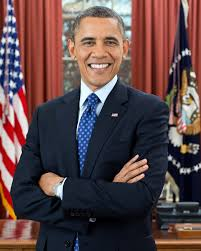

In [9]:
cv2_imshow(frame)

#3. DNN Model

In [10]:
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

In [12]:
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [14]:
model.setInput(blob)
detections = model.forward()
print(detections)

[[[[0.         1.         0.9999944  ... 0.06445743 0.6099704
    0.33674896]
   [0.         1.         0.13304923 ... 0.36649123 0.9920384
    0.540483  ]
   [0.         1.         0.12614086 ... 3.9947686  4.834924
    4.979075  ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


0.9999944 74 16 122 84


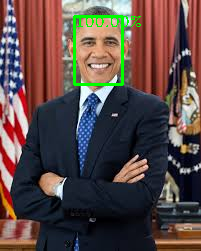

In [18]:
for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability)
        confidence = detections[0, 0, i, 2]
        if confidence > min_confidence:
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (startX, startY, endX, endY) = box.astype('int')
            print(confidence, startX, startY, endX, endY)
            text = '{:.2f}%'.format(confidence*100)
            y = startY - 10 if startY -10 > 10else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)
# Show the output
cv2_imshow(frame)